In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')


# 1.Data Loading.

In [144]:
df=pd.read_csv("DS2_C5_S6_AllRent_Data_Challenge.csv")
df

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,100591,1.0,0,cd6e0616a89b2687b8d7b80a1e982ac2,08-04-2016 05:59,58TH! LARGE SPACIOUS STUDIO W/ SEPARATE KITCHE...,East 58th Street,"['Pre-War', 'Dishwasher', 'Hardwood Floors', '...",40.7590,6844961,-73.9621,fc6e39fa6d54cfbc0109950411df29ca,['https://photos.renthop.com/2/6844961_5b045ca...,2000,401 East 58th Street,medium
9867,86449,1.0,2,27e0ae0427a5150191c73831eb901ab0,13-04-2016 15:40,Beautiful Renovated Large True 2 bedrrom apart...,EAST 11 TH ST,"['Cats Allowed', 'Private Outdoor Space', 'Dog...",40.7187,6868922,-73.9919,3e0c28a1f4b9c11b809ff21dbb920b5c,['https://photos.renthop.com/2/6868922_d14a762...,3590,EAST 11 TH ST,medium
9868,44736,1.0,1,d843d07dfbd498625ffd8d9e6078745e,12-05-2016 05:41,Great Deal that won't last!Become a lucky resi...,Amsterdam Avenue,"['Elevator', 'Furnished', 'Laundry in Unit', '...",40.8002,7002179,-73.9656,4c168ba2cf07ab943c98cada6160d2d1,['https://photos.renthop.com/2/7002179_2c2510f...,3000,933 Amsterdam Avenue,medium
9869,100906,1.0,0,b401b080b557697e91b2d19b5a22fac9,21-04-2016 04:56,Stunning West Village apartment available for ...,W 13 Street,"['Elevator', 'Loft', 'Hardwood Floors', 'Dogs ...",40.7383,6906479,-74.0006,4414b04ea8115e64639b64b73737036a,['https://photos.renthop.com/2/6906479_a898cc6...,2525,205 W 13 Street,medium


In [145]:
df.shape

(9871, 16)

In [146]:
df.columns

Index(['Unnamed: 0', 'bathrooms', 'bedrooms', 'building_id', 'created',
       'description', 'display_address', 'features', 'latitude', 'listing_id',
       'longitude', 'manager_id', 'photos', 'price', 'street_address',
       'interest_level'],
      dtype='object')

# 2.Data Exploration.

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   float64
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   object 
 4   created          9871 non-null   object 
 5   description      9585 non-null   object 
 6   display_address  9837 non-null   object 
 7   features         9871 non-null   object 
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   object 
 12  photos           9871 non-null   object 
 13  price            9871 non-null   int64  
 14  street_address   9866 non-null   object 
 15  interest_level   9871 non-null   object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


In [148]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,9871.000000,9871.000000,9871.000000,9871.000000,9.871000e+03,9871.000000,9871.000000
mean,61828.973154,1.210617,1.533685,40.747167,7.024062e+06,-73.965549,3662.860804
std,35901.607107,0.501985,1.106696,0.414548,1.269108e+05,0.760686,2559.911997
min,9.000000,0.000000,0.000000,0.000000,6.812005e+06,-87.613400,43.000000
25%,30968.000000,1.000000,1.000000,40.727500,6.914494e+06,-73.992200,2499.000000
50%,61354.000000,1.000000,1.000000,40.750600,7.022816e+06,-73.978300,3125.000000
75%,93229.500000,1.000000,2.000000,40.773900,7.130978e+06,-73.955100,4047.500000
max,123995.000000,10.000000,8.000000,43.034600,7.742631e+06,0.000000,90000.000000


In [149]:
df.corr()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
Unnamed: 0,1.000000,-0.007826,-0.024353,-0.008849,-0.855608,0.005866,-0.010804
bathrooms,-0.007826,1.000000,0.528971,0.007422,0.000749,-0.000629,0.617426
bedrooms,-0.024353,0.528971,1.000000,0.015035,0.021417,-0.008100,0.431208
latitude,-0.008849,0.007422,0.015035,1.000000,0.012773,-0.967374,0.005881
listing_id,-0.855608,0.000749,0.021417,0.012773,1.000000,-0.008984,-0.000628
longitude,0.005866,-0.000629,-0.008100,-0.967374,-0.008984,1.000000,-0.009305
price,-0.010804,0.617426,0.431208,0.005881,-0.000628,-0.009305,1.000000


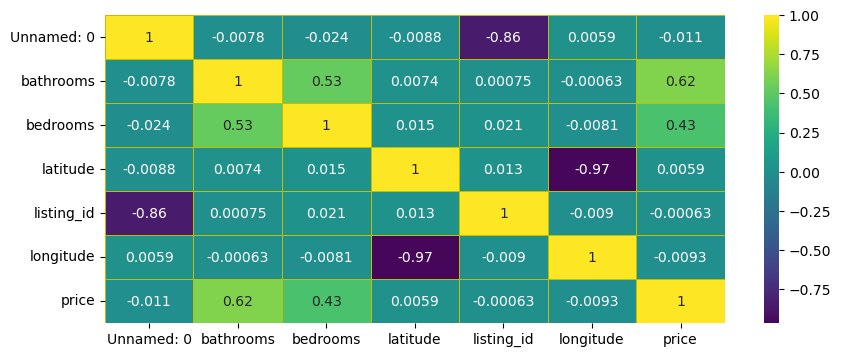

In [150]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='y',linewidths=.5,cmap='viridis',center=0);

# Data Preproceesing.

In [151]:
df.isnull().sum()

Unnamed: 0           0
bathrooms            0
bedrooms             0
building_id          0
created              0
description        286
display_address     34
features             0
latitude             0
listing_id           0
longitude            0
manager_id           0
photos               0
price                0
street_address       5
interest_level       0
dtype: int64

In [152]:
df[df['description'].isnull()]
df['description'].value_counts()
df['description']=df['description'].fillna('website_redacted')

In [153]:
df[df['display_address'].isnull()]
df['display_address'].value_counts()
df['display_address']=df['display_address'].fillna('Broadway')

In [154]:
df[df['street_address'].isnull()]
df['street_address'].value_counts()
df['street_address']=df['street_address'].fillna('Water Street ')

In [155]:
df.isnull().sum()

Unnamed: 0         0
bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [156]:
for i in df.columns:
    print(i,'=',df[i].nunique())

Unnamed: 0 = 9871
bathrooms = 12
bedrooms = 8
building_id = 3275
created = 7892
description = 8681
display_address = 3233
features = 3548
latitude = 1632
listing_id = 9871
longitude = 1169
manager_id = 2074
photos = 9186
price = 1318
street_address = 5510
interest_level = 3


In [157]:
df['created']=pd.to_datetime(df['created'])

In [158]:
df['bathrooms']=df['bathrooms'].astype('category')
df['bedrooms']=df['bedrooms'].astype('category')
df['interest_level']=df['interest_level'].astype('category')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       9871 non-null   int64         
 1   bathrooms        9871 non-null   category      
 2   bedrooms         9871 non-null   category      
 3   building_id      9871 non-null   object        
 4   created          9871 non-null   datetime64[ns]
 5   description      9871 non-null   object        
 6   display_address  9871 non-null   object        
 7   features         9871 non-null   object        
 8   latitude         9871 non-null   float64       
 9   listing_id       9871 non-null   int64         
 10  longitude        9871 non-null   float64       
 11  manager_id       9871 non-null   object        
 12  photos           9871 non-null   object        
 13  price            9871 non-null   int64         
 14  street_address   9871 non-null   object 

In [160]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['bathrooms']=a.fit_transform(df['bathrooms'])
df['bedrooms']=a.fit_transform(df['bedrooms'])
df['building_id']=a.fit_transform(df['building_id'])
df['created']=a.fit_transform(df['created'])
df['description']=a.fit_transform(df['description'])
df['display_address']=a.fit_transform(df['display_address'])
df['features']=a.fit_transform(df['features'])
df['manager_id']=a.fit_transform(df['manager_id'])
df['photos']=a.fit_transform(df['photos'])
df['street_address']=a.fit_transform(df['street_address'])
df['interest_level']=a.fit_transform(df['interest_level'])

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9871 non-null   int64  
 1   bathrooms        9871 non-null   int64  
 2   bedrooms         9871 non-null   int64  
 3   building_id      9871 non-null   int32  
 4   created          9871 non-null   int64  
 5   description      9871 non-null   int32  
 6   display_address  9871 non-null   int32  
 7   features         9871 non-null   int32  
 8   latitude         9871 non-null   float64
 9   listing_id       9871 non-null   int64  
 10  longitude        9871 non-null   float64
 11  manager_id       9871 non-null   int32  
 12  photos           9871 non-null   int32  
 13  price            9871 non-null   int64  
 14  street_address   9871 non-null   int32  
 15  interest_level   9871 non-null   int32  
dtypes: float64(2), int32(8), int64(6)
memory usage: 925.5 KB


# 4.Data Visualization.

In [162]:
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<20:
        cat.append(i)
    else:
        num.append(i)

In [163]:
cat

['bathrooms', 'bedrooms', 'interest_level']

In [164]:
num

['Unnamed: 0',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address']

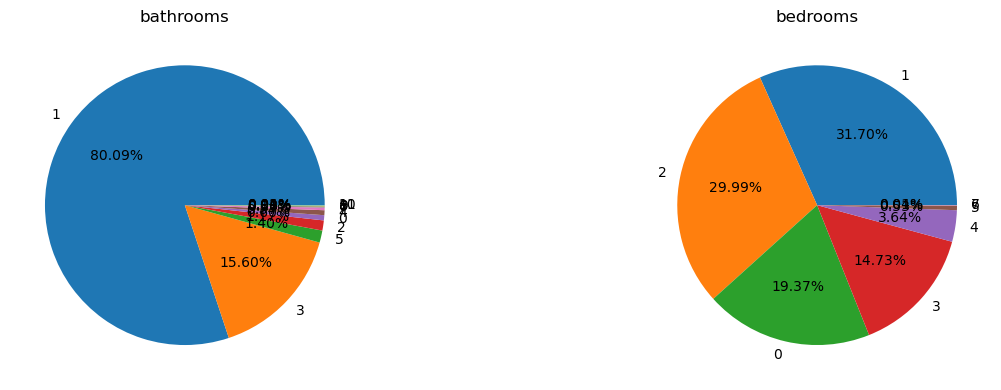

In [165]:
cat_cols=cat
num_col=2
num_rows=int(len(cat_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(15,4))
for col,ax in zip(cat_cols,axs.flatten()[:len(cat_cols)]):
    ax.pie(labels=df[col].value_counts().index,x=df[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col)

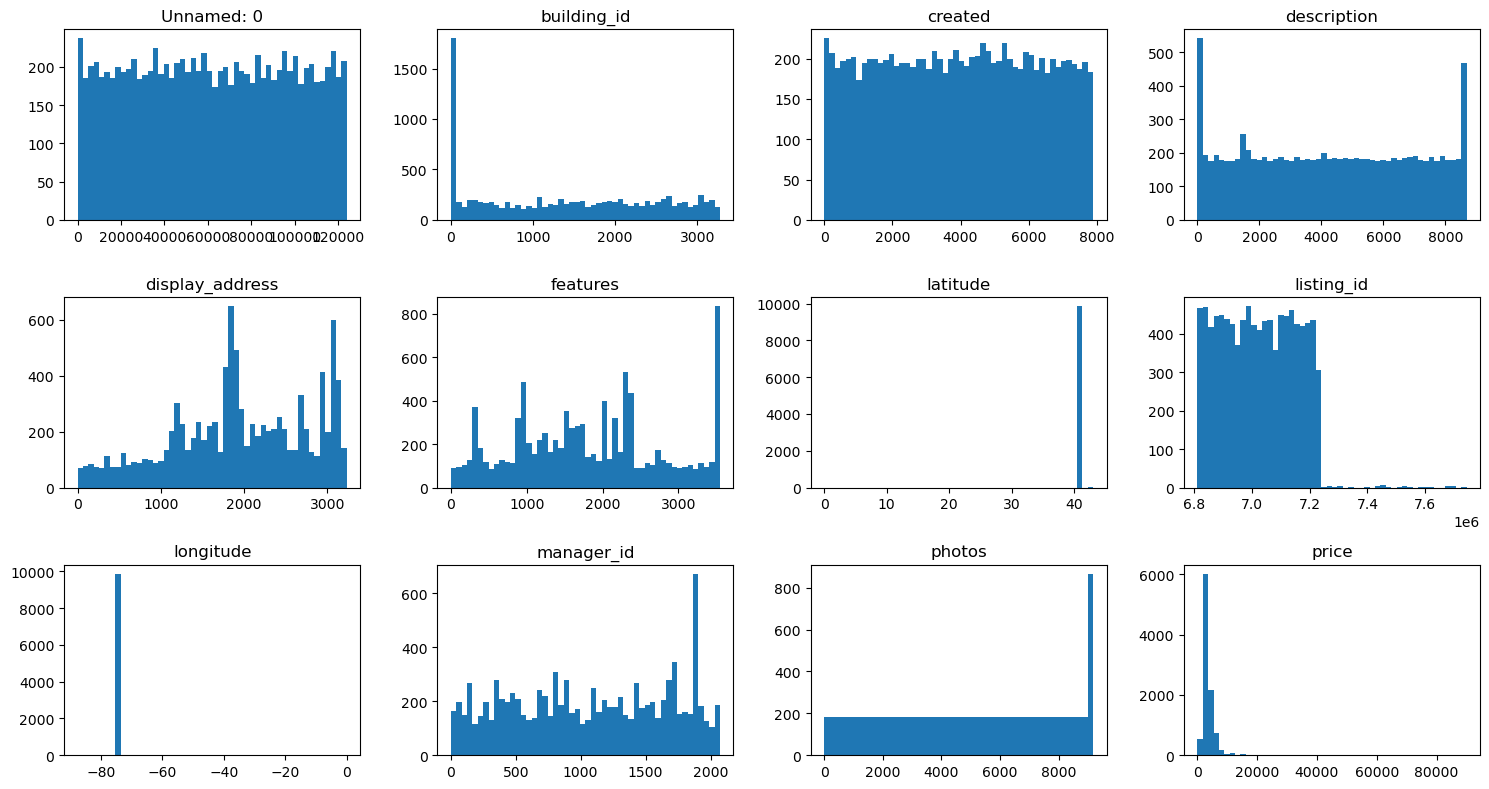

In [166]:
numerica_cols=num
num_col=4
bins=50
num_rows=int(len(numerica_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(15,8))
for col,ax in zip(numerica_cols,axs.flatten()[:len(numerica_cols)]):
    ax.hist(df[col],bins=bins)
    ax.set_title(col)

In [167]:
df=df.drop(columns=['Unnamed: 0','building_id','created','manager_id','street_address','display_address','description','photos'],axis=1)
df

,bathrooms,bedrooms,features,latitude,listing_id,longitude,price,interest_level
0,1,0,169,40.7672,6827153,-73.9802,2800,0
1,1,1,320,40.7483,6908998,-73.9741,2100,0
2,1,1,1599,40.7399,7013774,-73.9812,3000,0
3,1,2,959,40.7530,7113518,-73.9958,3000,0
4,1,2,656,40.7695,7071666,-73.9603,3300,0
...,...,...,...,...,...,...,...,...
9866,1,0,2322,40.7590,6844961,-73.9621,2000,2
9867,1,2,365,40.7187,6868922,-73.9919,3590,2
9868,1,1,1603,40.8002,7002179,-73.9656,3000,2
9869,1,0,1690,40.7383,6906479,-74.0006,2525,2


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       9871 non-null   int64  
 1   bedrooms        9871 non-null   int64  
 2   features        9871 non-null   int32  
 3   latitude        9871 non-null   float64
 4   listing_id      9871 non-null   int64  
 5   longitude       9871 non-null   float64
 6   price           9871 non-null   int64  
 7   interest_level  9871 non-null   int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 539.9 KB


# Model Building 

# Base line for Logistic Regression.

In [169]:
x=df.drop(columns='interest_level',axis=1)
y=df['interest_level']

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [171]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [172]:
from sklearn.linear_model import LogisticRegression
DT=LogisticRegression()
model=DT.fit(x_train,y_train)
model.score(x_train,y_train)

0.6927558257345492

In [173]:
model=DT.fit(x_test,y_test)
model.score(x_train,y_train)

0.6950354609929078

In [174]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [175]:
from sklearn.metrics import accuracy_score
print('Accuracy_score',accuracy_score(y_test,y_pred))

Accuracy_score 0.6911392405063291


In [176]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       167
           1       0.71      0.98      0.82      1358
           2       0.41      0.08      0.14       450

    accuracy                           0.69      1975
   macro avg       0.37      0.35      0.32      1975
weighted avg       0.58      0.69      0.60      1975



# Bagging for Random Forest. 

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
RC=RandomForestClassifier()
cv=KFold(n_splits=7,shuffle=True,random_state=42)
score=cross_val_score(RC,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('mean.score',score.mean())

mean.score 0.7028693353783452


In [185]:
model1=RC.fit(x_train,y_train)
model1.score(x_train,y_train)

1.0

In [186]:
model1=RC.fit(x_test,y_test)
model1.score(x_train,y_train)

0.6115754812563323

In [187]:
y_pred1=model1.predict(x_test)
y_pred1

array([2, 1, 1, ..., 2, 1, 1])

In [188]:
from sklearn.metrics import accuracy_score
print('Accuracy_score',accuracy_score(y_test,y_pred))

Accuracy_score 0.6911392405063291


In [189]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       167
           1       0.71      0.98      0.82      1358
           2       0.41      0.08      0.14       450

    accuracy                           0.69      1975
   macro avg       0.37      0.35      0.32      1975
weighted avg       0.58      0.69      0.60      1975



# Compare models for different train test split pairs of data and with different base learners.